### Sales analysis using pandas and plotly

In [59]:
import pandas as pd
import plotly
import plotly.express as px
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load data
df = pd.read_excel('data.xlsx', engine='openpyxl')

In [4]:
df.head()

Row ID        Order ID Order Date       Ship Mode Customer ID  \
0      13  CA-2017-114412 2020-04-15  Standard Class    AA-10480   
1      24  US-2017-156909 2020-07-16    Second Class    SF-20065   
2      35  CA-2017-107727 2020-10-19    Second Class    MA-17560   
3      42  CA-2017-120999 2020-09-10  Standard Class    LC-16930   
4      44  CA-2017-139619 2020-09-19  Standard Class    ES-14080   

     Customer Name      Segment        Country          City           State  \
0     Andrew Allen     Consumer  United States       Concord  North Carolina   
1  Sandra Flanagan     Consumer  United States  Philadelphia    Pennsylvania   
2     Matt Abelman  Home Office  United States       Houston           Texas   
3   Linda Cazamias    Corporate  United States    Naperville        Illinois   
4       Erin Smith    Corporate  United States     Melbourne         Florida   

   Postal Code   Region       Product ID         Category Sub-Category  \
0        28027    South  OFF-PA-10002365  Office Supplies        Paper   
1        19140     East  FUR-CH-10002774        Furniture       Chairs   
2        77095  Central  OFF-PA-10000249  Office Supplies        Paper   
3        60540  Central  TEC-PH-10004093       Technology       Phones   
4        32935    South  OFF-ST-10003282  Office Supplies      Storage   

                                        Product Name    Sales  Quantity  \
0                                         Xerox 1967   15.552         3   
1                 Global Deluxe Stacking Chair, Gray   71.372         2   
2                                  Easy-staple paper   29.472         3   
3                                 Panasonic Kx-TS550  147.168         4   
4  Advantus 10-Drawer Portable Organizer, Chrome ...   95.616         2   

   Discount   Profit  
0       0.2   5.4432  
1       0.3  -1.0196  
2       0.2   9.9468  
3       0.2  16.5564  
4       0.2   9.5616

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3312 non-null   int64         
 1   Order ID       3312 non-null   object        
 2   Order Date     3312 non-null   datetime64[ns]
 3   Ship Mode      3312 non-null   object        
 4   Customer ID    3312 non-null   object        
 5   Customer Name  3312 non-null   object        
 6   Segment        3312 non-null   object        
 7   Country        3312 non-null   object        
 8   City           3312 non-null   object        
 9   State          3312 non-null   object        
 10  Postal Code    3312 non-null   int64         
 11  Region         3312 non-null   object        
 12  Product ID     3312 non-null   object        
 13  Category       3312 non-null   object        
 14  Sub-Category   3312 non-null   object        
 15  Product Name   3312 n

In [6]:
df.describe()

Row ID   Postal Code         Sales     Quantity     Discount  \
count  3312.000000   3312.000000   3312.000000  3312.000000  3312.000000   
mean   5087.107488  56186.515097    221.381418     3.766908     0.156467   
std    2817.482266  31980.375516    585.257531     2.221776     0.207429   
min      13.000000   1841.000000      0.444000     1.000000     0.000000   
25%    2655.750000  27978.750000     17.018000     2.000000     0.000000   
50%    5183.500000  60472.500000     53.810000     3.000000     0.200000   
75%    7498.250000  90032.000000    205.105700     5.000000     0.200000   
max    9994.000000  99301.000000  13999.960000    14.000000     0.800000   

            Profit  
count  3312.000000  
mean     28.212340  
std     241.864342  
min   -3839.990400  
25%       1.763200  
50%       8.296800  
75%      28.315125  
max    6719.980800

In [7]:
# highest sale
df[df['Sales'] == df['Sales'].max()]

Row ID        Order ID Order Date    Ship Mode Customer ID  \
2710    8154  CA-2017-140151 2020-03-23  First Class    RB-19360   

     Customer Name   Segment        Country     City       State  Postal Code  \
2710  Raymond Buch  Consumer  United States  Seattle  Washington        98115   

     Region       Product ID    Category Sub-Category  \
2710   West  TEC-CO-10004722  Technology      Copiers   

                               Product Name     Sales  Quantity  Discount  \
2710  Canon imageCLASS 2200 Advanced Copier  13999.96         4       0.0   

         Profit  
2710  6719.9808

In [8]:
# to get unique values from columns
df['Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [9]:
# check for nan values
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
# use pandasprofiling to get automated reports

#profile = ProfileReport(df, title='Sales Analysis Report')
#profile.to_widgets()

In [11]:
# export report as html
#profile.to_file('Sales_Report.html')

In [12]:
# highest sale alternative method
df.nlargest(1,'Sales')

Row ID        Order ID Order Date    Ship Mode Customer ID  \
2710    8154  CA-2017-140151 2020-03-23  First Class    RB-19360   

     Customer Name   Segment        Country     City       State  Postal Code  \
2710  Raymond Buch  Consumer  United States  Seattle  Washington        98115   

     Region       Product ID    Category Sub-Category  \
2710   West  TEC-CO-10004722  Technology      Copiers   

                               Product Name     Sales  Quantity  Discount  \
2710  Canon imageCLASS 2200 Advanced Copier  13999.96         4       0.0   

         Profit  
2710  6719.9808

In [13]:
# Average discount of each subcategory

df.groupby('Sub-Category')['Discount'].mean()

Sub-Category
Accessories    0.072000
Appliances     0.176364
Art            0.078723
Binders        0.378200
Bookcases      0.214737
Chairs         0.167368
Copiers        0.154545
Envelopes      0.087324
Fasteners      0.065625
Furnishings    0.129114
Labels         0.063158
Machines       0.300000
Paper          0.079303
Phones         0.163946
Storage        0.075694
Supplies       0.071186
Tables         0.265385
Name: Discount, dtype: float64

In [14]:
# create month, year columns from order date
# if order date not in datetime format - then first change using pd.to_datetime
# here it is already in datetime format

df['order_date_month'] = df['Order Date'].dt.month
df['order_date_year'] = df['Order Date'].dt.year

In [15]:
df.head()

Row ID        Order ID Order Date       Ship Mode Customer ID  \
0      13  CA-2017-114412 2020-04-15  Standard Class    AA-10480   
1      24  US-2017-156909 2020-07-16    Second Class    SF-20065   
2      35  CA-2017-107727 2020-10-19    Second Class    MA-17560   
3      42  CA-2017-120999 2020-09-10  Standard Class    LC-16930   
4      44  CA-2017-139619 2020-09-19  Standard Class    ES-14080   

     Customer Name      Segment        Country          City           State  \
0     Andrew Allen     Consumer  United States       Concord  North Carolina   
1  Sandra Flanagan     Consumer  United States  Philadelphia    Pennsylvania   
2     Matt Abelman  Home Office  United States       Houston           Texas   
3   Linda Cazamias    Corporate  United States    Naperville        Illinois   
4       Erin Smith    Corporate  United States     Melbourne         Florida   

   ...       Product ID         Category Sub-Category  \
0  ...  OFF-PA-10002365  Office Supplies        Paper   
1  ...  FUR-CH-10002774        Furniture       Chairs   
2  ...  OFF-PA-10000249  Office Supplies        Paper   
3  ...  TEC-PH-10004093       Technology       Phones   
4  ...  OFF-ST-10003282  Office Supplies      Storage   

                                        Product Name    Sales Quantity  \
0                                         Xerox 1967   15.552        3   
1                 Global Deluxe Stacking Chair, Gray   71.372        2   
2                                  Easy-staple paper   29.472        3   
3                                 Panasonic Kx-TS550  147.168        4   
4  Advantus 10-Drawer Portable Organizer, Chrome ...   95.616        2   

   Discount   Profit  order_date_month  order_date_year  
0       0.2   5.4432                 4             2020  
1       0.3  -1.0196                 7             2020  
2       0.2   9.9468                10             2020  
3       0.2  16.5564                 9             2020  
4       0.2   9.5616                 9             2020  

[5 rows x 22 columns]

In [16]:
# calculate profit margin

df['profit_margin'] = df['Profit']/df['Sales']

In [17]:
# if you need to export to excel
# df.to_excel('dataoutput.xlsx', index=False)

In [18]:
# total profit and sales by subcategory

df_by_subcat= df.groupby('Sub-Category').sum()
df_by_subcat.head()

Row ID  Postal Code       Sales  Quantity  Discount  \
Sub-Category                                                         
Accessories   1449605     15762114  59946.2320      1079     19.80   
Appliances     874517      9377881  42926.9320       654     29.10   
Art           1377681     16355998   8863.0680      1101     22.20   
Binders       2500416     29015384  72788.0450      2067    189.10   
Bookcases      384522      4483249  30024.2797       276     16.32   

                  Profit  order_date_month  order_date_year  profit_margin  
Sub-Category                                                                
Accessories   15672.3570              2153           555500      62.655000  
Appliances     7865.2683              1255           333300     -36.133889  
Art            2221.9631              2146           569640      70.995000  
Binders        7669.7418              3841          1010000    -107.832500  
Bookcases      -583.6261               552           153520     -11.233641

In [19]:
# we can use a function for grouping data

def grouped_data(column_name, method):
    df_tmp = df.groupby(column_name).agg(method)
    return df_tmp

In [20]:
# we can get total values by state using the function
grouped_data('Segment', 'sum')

Row ID  Postal Code        Sales  Quantity  Discount  \
Segment                                                              
Consumer     8561367     92871614  331904.6999      6282    264.12   
Corporate    5023960     54879479  241847.8244      3758    154.68   
Home Office  3263173     38338645  159462.7309      2436     99.42   

                 Profit  order_date_month  order_date_year  profit_margin  
Segment                                                                    
Consumer     45568.2391             13115          3369360     186.803297  
Corporate    26782.3633              7679          1979600     111.247822  
Home Office  21088.6672              4811          1341280      86.078886

In [21]:
# using plotly 
template_style= 'plotly_white'

In [22]:
# histogram
px.histogram(df, x='Sales', template=template_style, title='Distribution of Sales')

In [23]:
# sales, profit by sub category

data = grouped_data('Sub-Category', 'sum')
fig = px.bar(data,
      y=['Sales','Profit'],
      title='Sales and Profit by Sub-Category',
             barmode='group',
      template=template_style)

fig.update_xaxes(tickangle=270)

fig.show()
# to export as html
#plotly.offline.plot(fig, filename='sales_subcat_plot', auto_open=False)

In [24]:
# viewing it in a different way
fig = px.bar(data,
      y='Sales',
      title='Sales by Sub-Category',
             barmode='group',
             color='Profit',
             color_continuous_scale=['red','yellow','green'],
      template=template_style)

fig.update_xaxes(tickangle=270)

fig.show()

#### Look into negative profit of Tables sales

In [25]:
fig = px.scatter(df,
      x='Sales',
      y='Profit',           
      title='Sales vs Profit vs Discount',
             color='Discount',
      template=template_style)

fig.update_xaxes(tickangle=270)

fig.show()

# we see discount and profit is -vely correlated. 

In [26]:
# groupby columns with different agg functions
df_subcat= df.groupby('Sub-Category').agg({'Discount':'mean',
                                          'Profit':'sum'})
df_subcat.head(3)

Discount      Profit
Sub-Category                      
Accessories   0.072000  15672.3570
Appliances    0.176364   7865.2683
Art           0.078723   2221.9631

In [27]:
# mean discount by sub-category
fig = px.bar(df_subcat,
      y='Discount',           
      title='Mean Discount by Sub-Category',
             color='Profit',
             color_continuous_scale=['red','yellow','green'],
      template=template_style)

fig.update_xaxes(tickangle=270)

fig.show()

In [28]:
# Plot sales and profit for the year 2020

df_sorted= df.sort_values(by='Order Date')
df_sorted.head(3)

Row ID        Order ID Order Date       Ship Mode Customer ID  \
2679    8070  CA-2017-151750 2020-01-01  Standard Class    JM-15250   
2685    8076  CA-2017-151750 2020-01-01  Standard Class    JM-15250   
232      849  CA-2017-107503 2020-01-01  Standard Class    GA-14725   

      Customer Name   Segment        Country        City  State  ...  \
2679   Janet Martin  Consumer  United States  Huntsville  Texas  ...   
2685   Janet Martin  Consumer  United States  Huntsville  Texas  ...   
232   Guy Armstrong  Consumer  United States      Lorain   Ohio  ...   

             Category Sub-Category  \
2679  Office Supplies      Storage   
2685  Office Supplies   Appliances   
232         Furniture  Furnishings   

                                           Product Name    Sales Quantity  \
2679                      SAFCO Boltless Steel Shelving  454.560        5   
2685  Fellowes Superior 10 Outlet Split Surge Protector   15.224        2   
232                  Linden 10" Round Wall Clock, Black   48.896        4   

     Discount    Profit  order_date_month  order_date_year  profit_margin  
2679      0.2 -107.9580                 1             2020        -0.2375  
2685      0.8  -38.8212                 1             2020        -2.5500  
232       0.2    8.5568                 1             2020         0.1750  

[3 rows x 23 columns]

In [29]:
# add cumulative sales and profit

df_sorted['cumulative_sales'] = df_sorted['Sales'].cumsum()
df_sorted['cumulative_profit'] = df_sorted['Profit'].cumsum()

In [30]:
df_sorted.head(3)

Row ID        Order ID Order Date       Ship Mode Customer ID  \
2679    8070  CA-2017-151750 2020-01-01  Standard Class    JM-15250   
2685    8076  CA-2017-151750 2020-01-01  Standard Class    JM-15250   
232      849  CA-2017-107503 2020-01-01  Standard Class    GA-14725   

      Customer Name   Segment        Country        City  State  ...  \
2679   Janet Martin  Consumer  United States  Huntsville  Texas  ...   
2685   Janet Martin  Consumer  United States  Huntsville  Texas  ...   
232   Guy Armstrong  Consumer  United States      Lorain   Ohio  ...   

                                           Product Name    Sales Quantity  \
2679                      SAFCO Boltless Steel Shelving  454.560        5   
2685  Fellowes Superior 10 Outlet Split Surge Protector   15.224        2   
232                  Linden 10" Round Wall Clock, Black   48.896        4   

     Discount    Profit order_date_month  order_date_year  profit_margin  \
2679      0.2 -107.9580                1             2020        -0.2375   
2685      0.8  -38.8212                1             2020        -2.5500   
232       0.2    8.5568                1             2020         0.1750   

      cumulative_sales  cumulative_profit  
2679           454.560          -107.9580  
2685           469.784          -146.7792  
232            518.680          -138.2224  

[3 rows x 25 columns]

In [31]:
# line plot

fig = px.line(df_sorted,
             x='Order Date',
             y=['cumulative_sales','cumulative_profit'],
              title='Cumulative Sales and Profit for 2020',
             template=template_style)

fig.show()

In [32]:
# source: https://stackoverflow.com/questions/48979352/choropleth-map-in-python-using-plotly-without-state-codes#50165264
state_codes = {
    'District of Columbia' : 'DC','Mississippi': 'MS', 'Oklahoma': 'OK', 
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 
    'Nevada': 'NV', 'Maine': 'ME'}

df['state_code'] = df['State'].apply(lambda x : state_codes[x])

In [33]:
df.state_code.unique()

array(['NC', 'PA', 'TX', 'IL', 'FL', 'MI', 'SC', 'MN', 'OR', 'NY', 'CA',
       'AZ', 'OH', 'MO', 'NJ', 'TN', 'VA', 'MA', 'GA', 'NV', 'RI', 'WA',
       'KY', 'MS', 'IN', 'MT', 'CO', 'WI', 'IA', 'MD', 'NM', 'AL', 'NE',
       'DE', 'OK', 'DC', 'LA', 'VT', 'CT', 'SD', 'UT', 'AR', 'ID', 'KS',
       'ND', 'NH', 'WV'], dtype=object)

In [34]:
# Groupby state and 2-digit code
df_choro = df.groupby(['state_code','State']).sum()
df_choro = df_choro.reset_index()

In [35]:
# Maine and Wyoming no data
df_choro.head()

state_code       State   Row ID  Postal Code        Sales  Quantity  \
0         AL     Alabama    80441       570606    1828.2500        57   
1         AR    Arkansas   110224      1373856    2707.6400        78   
2         AZ     Arizona   354273      5967121   11133.5370       258   
3         CA  California  3431755     61239507  146388.3445      2633   
4         CO    Colorado   326694      4892785   10299.8130       240   

   Discount      Profit  order_date_month  order_date_year  profit_margin  
0       0.0    496.3771               113            32320       5.220000  
1       0.0    959.4027               181            38380       7.260000  
2      22.4  -1276.0025               541           141400      -6.863333  
3      47.0  29366.4589              5055          1339260     184.827941  
4      19.2  -4435.8483               542           123220      -7.920833

In [36]:
fig = px.choropleth(df_choro, locations='state_code', locationmode="USA-states", color='Sales',
                    color_continuous_scale='blues',
                    title='Total Sales by State',
                    scope="usa", hover_name="State")
fig.show()

fig = px.choropleth(df_choro, locations='state_code', locationmode="USA-states", color='Profit',
                    color_continuous_scale='greens',
                    title='Total Profit by State',
                    scope="usa", hover_name="State")
fig.show()

fig = px.choropleth(df_choro, locations='state_code', locationmode="USA-states", color='Discount',
                    color_continuous_scale='reds',
                    title='Total Discount by State',
                    scope="usa", hover_name="State")
fig.show()

fig = px.choropleth(df_choro, locations='state_code', locationmode="USA-states", color='profit_margin',
                    color_continuous_scale='greens',
                    title='Profit Margin by State',
                    scope="usa", hover_name="State")
fig.show()

## What products are often sold together?

In [37]:
# find all duplicated rows 
df_duplicated = df[df['Order ID'].duplicated(keep=False)]

# we need to create copy of product name to include all features(remove comma in name )
df_duplicated['product_name_copy'] = df_duplicated['Product Name'].str.replace(',', '')

df_duplicated.head()

C:\Users\johnd\AppData\Local\Temp\ipykernel_39696\1826725317.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Row ID        Order ID Order Date       Ship Mode Customer ID  \
6       76  US-2017-118038 2020-12-09     First Class    KB-16600   
7       77  US-2017-118038 2020-12-09     First Class    KB-16600   
8       78  US-2017-118038 2020-12-09     First Class    KB-16600   
11      87  CA-2017-155558 2020-10-26  Standard Class    PG-18895   
12      88  CA-2017-155558 2020-10-26  Standard Class    PG-18895   

    Customer Name    Segment        Country       City      State  ...  \
6     Ken Brennan  Corporate  United States    Houston      Texas  ...   
7     Ken Brennan  Corporate  United States    Houston      Texas  ...   
8     Ken Brennan  Corporate  United States    Houston      Texas  ...   
11  Paul Gonzalez   Consumer  United States  Rochester  Minnesota  ...   
12  Paul Gonzalez   Consumer  United States  Rochester  Minnesota  ...   

                                         Product Name   Sales Quantity  \
6                                     Economy Binders   1.248        3   
7                        6" Cubicle Wall Clock, Black   9.708        3   
8   SimpliFile Personal File, Black Granite, 15w x...  27.240        3   
11  Logitech LS21 Speaker System - PC Multimedia -...  19.990        1   
12                                          Avery 511   6.160        2   

   Discount  Profit order_date_month  order_date_year  profit_margin  \
6       0.8 -1.9344               12             2020          -1.55   
7       0.6 -5.8248               12             2020          -0.60   
8       0.2  2.7240               12             2020           0.10   
11      0.0  6.7966               10             2020           0.34   
12      0.0  2.9568               10             2020           0.48   

    state_code                                  product_name_copy  
6           TX                                    Economy Binders  
7           TX                        6" Cubicle Wall Clock Black  
8           TX  SimpliFile Personal File Black Granite 15w x 6...  
11          MN  Logitech LS21 Speaker System - PC Multimedia -...  
12          MN                                          Avery 511  

[5 rows x 25 columns]

In [38]:
# we groupby order ID and create new column for products of each duplicated order ID
df_duplicated['Grouped']=df_duplicated.groupby('Order ID')['product_name_copy'].transform(lambda x: ','.join(x))

C:\Users\johnd\AppData\Local\Temp\ipykernel_39696\1377865245.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
df_duplicated.head()

Row ID        Order ID Order Date       Ship Mode Customer ID  \
6       76  US-2017-118038 2020-12-09     First Class    KB-16600   
7       77  US-2017-118038 2020-12-09     First Class    KB-16600   
8       78  US-2017-118038 2020-12-09     First Class    KB-16600   
11      87  CA-2017-155558 2020-10-26  Standard Class    PG-18895   
12      88  CA-2017-155558 2020-10-26  Standard Class    PG-18895   

    Customer Name    Segment        Country       City      State  ...  \
6     Ken Brennan  Corporate  United States    Houston      Texas  ...   
7     Ken Brennan  Corporate  United States    Houston      Texas  ...   
8     Ken Brennan  Corporate  United States    Houston      Texas  ...   
11  Paul Gonzalez   Consumer  United States  Rochester  Minnesota  ...   
12  Paul Gonzalez   Consumer  United States  Rochester  Minnesota  ...   

     Sales Quantity Discount  Profit order_date_month order_date_year  \
6    1.248        3      0.8 -1.9344               12            2020   
7    9.708        3      0.6 -5.8248               12            2020   
8   27.240        3      0.2  2.7240               12            2020   
11  19.990        1      0.0  6.7966               10            2020   
12   6.160        2      0.0  2.9568               10            2020   

    profit_margin  state_code  \
6           -1.55          TX   
7           -0.60          TX   
8            0.10          TX   
11           0.34          MN   
12           0.48          MN   

                                    product_name_copy  \
6                                     Economy Binders   
7                         6" Cubicle Wall Clock Black   
8   SimpliFile Personal File Black Granite 15w x 6...   
11  Logitech LS21 Speaker System - PC Multimedia -...   
12                                          Avery 511   

                                              Grouped  
6   Economy Binders,6" Cubicle Wall Clock Black,Si...  
7   Economy Binders,6" Cubicle Wall Clock Black,Si...  
8   Economy Binders,6" Cubicle Wall Clock Black,Si...  
11  Logitech LS21 Speaker System - PC Multimedia -...  
12  Logitech LS21 Speaker System - PC Multimedia -...  

[5 rows x 26 columns]

In [40]:
# we keep order id and grouped columns, drop duplicates

df_grouped = df_duplicated[['Order ID', 'Grouped']].drop_duplicates()

# this is how grouped column looks
df_grouped.iloc[0,1]

'Economy Binders,6" Cubicle Wall Clock Black,SimpliFile Personal File Black Granite 15w x 6-15/16d x 11-1/4h'

In [78]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_grouped['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2)))

# display items bought in pairs
#print(count)

In [42]:
for key, value in count.most_common(10):
    print(key, value)

('Eldon Expressions Punched Metal & Wood Desk Accessories Black & Cherry', 'GBC DocuBind TL300 Electric Binding System') 2
('Wilson Jones Turn Tabs Binder Tool for Ring Binders', 'Adjustable Depth Letter/Legal Cart') 2
('Maxell\xa0iVDR EX 500GB Cartridge', 'Adjustable Depth Letter/Legal Cart') 2
('Staples', 'KI Adjustable-Height Table') 2
('Toshiba IPT2010-SD IP\xa0Telephone', 'KI Adjustable-Height Table') 2
('SAFCO Optional Arm Kit for Workspace Cribbage Stacking Chair', 'Belkin Premiere Surge Master II 8-outlet surge protector') 2
('OIC #2 Pencils Medium Soft', 'Avery 505') 2
('Newell 344', 'Memorex Micro Travel Drive 16 GB') 2
('Memorex Micro Travel Drive 16 GB', 'Wirebound Four 2-3/4 x 5 Forms per Page 400 Sets per Book') 2
('Memorex Micro Travel Drive 16 GB', 'Elite 5" Scissors') 2


In [79]:
count_2 = Counter()

for row in df_grouped['Grouped']:
    row_list= row.split(',')
    count_2.update(Counter(combinations(row_list,3)))

# display items bought in pairs
#print(count_2)

In [44]:
for key, value in count_2.most_common(10):
    print(key, value)

('Wilson Jones Turn Tabs Binder Tool for Ring Binders', 'Maxell\xa0iVDR EX 500GB Cartridge', 'Adjustable Depth Letter/Legal Cart') 2
('Newell 344', 'Memorex Micro Travel Drive 16 GB', 'Wirebound Four 2-3/4 x 5 Forms per Page 400 Sets per Book') 2
('Newell 344', 'Memorex Micro Travel Drive 16 GB', 'Elite 5" Scissors') 2
('Newell 344', 'Memorex Micro Travel Drive 16 GB', 'Staple-based wall hangings') 2
('Newell 344', 'Memorex Micro Travel Drive 16 GB', 'Eldon Image Series Desk Accessories Burgundy') 2
('Newell 344', 'Memorex Micro Travel Drive 16 GB', 'DAX Two-Tone Silver Metal Document Frame') 2
('Memorex Micro Travel Drive 16 GB', 'Wirebound Four 2-3/4 x 5 Forms per Page 400 Sets per Book', 'Elite 5" Scissors') 2
('Memorex Micro Travel Drive 16 GB', 'Wirebound Four 2-3/4 x 5 Forms per Page 400 Sets per Book', 'Staple-based wall hangings') 2
('Memorex Micro Travel Drive 16 GB', 'Wirebound Four 2-3/4 x 5 Forms per Page 400 Sets per Book', 'Eldon Image Series Desk Accessories Burgundy') 2

## Most common products bought in pairs

In [45]:
df_common_pairs = pd.DataFrame(count.most_common(), columns=['Products', 'Frequency'])
pd.set_option('display.max_colwidth', 200)
df_common_pairs

Products  \
0           (Eldon Expressions Punched Metal & Wood Desk Accessories Black & Cherry, GBC DocuBind TL300 Electric Binding System)   
1                                      (Wilson Jones Turn Tabs Binder Tool for Ring Binders, Adjustable Depth Letter/Legal Cart)   
2                                                           (Maxell iVDR EX 500GB Cartridge, Adjustable Depth Letter/Legal Cart)   
3                                                                                          (Staples, KI Adjustable-Height Table)   
4                                                                  (Toshiba IPT2010-SD IP Telephone, KI Adjustable-Height Table)   
...                                                                                                                          ...   
3236  (Ibico Ibimaster 300 Manual Binding System, Bravo II Megaboss 12-Amp Hard Body Upright Replacement Belts 2 Belts per Pack)   
3237                    (Logitech G430 Surround Sound Gaming Headset with Dolby 7.1 Technology, Panasonic KX - TS880B Telephone)   
3238                                                 (Tenex B1-RE Series Chair Mats for Low Pile Carpets, Aastra 57i VoIP phone)   
3239                      (Tenex B1-RE Series Chair Mats for Low Pile Carpets, It's Hot Message Books with Stickers 2 3/4" x 5")   
3240                                                   (Aastra 57i VoIP phone, It's Hot Message Books with Stickers 2 3/4" x 5")   

      Frequency  
0             2  
1             2  
2             2  
3             2  
4             2  
...         ...  
3236          1  
3237          1  
3238          1  
3239          1  
3240          1  

[3241 rows x 2 columns]

## Most common products bought in triples

In [46]:
df_common_triples = pd.DataFrame(count_2.most_common(), columns=['Products', 'Frequency'])
pd.set_option('display.max_colwidth', 200)
df_common_triples

Products  \
0                                             (Wilson Jones Turn Tabs Binder Tool for Ring Binders, Maxell iVDR EX 500GB Cartridge, Adjustable Depth Letter/Legal Cart)   
1                                                             (Newell 344, Memorex Micro Travel Drive 16 GB, Wirebound Four 2-3/4 x 5 Forms per Page 400 Sets per Book)   
2                                                                                                     (Newell 344, Memorex Micro Travel Drive 16 GB, Elite 5" Scissors)   
3                                                                                            (Newell 344, Memorex Micro Travel Drive 16 GB, Staple-based wall hangings)   
4                                                                          (Newell 344, Memorex Micro Travel Drive 16 GB, Eldon Image Series Desk Accessories Burgundy)   
...                                                                                                                                                                 ...   
3283                                   (Honeywell Enviracaire Portable HEPA Air Cleaner for 17' x 22' Room, Maxell LTO Ultrium - 800 GB, Cardinal Slant-D Ring Binders)   
3284                        (Honeywell Enviracaire Portable HEPA Air Cleaner for 17' x 22' Room, Logitech MX Performance Wireless Mouse, Cardinal Slant-D Ring Binders)   
3285                                                               (Maxell LTO Ultrium - 800 GB, Logitech MX Performance Wireless Mouse, Cardinal Slant-D Ring Binders)   
3286  (Fellowes Twister Kit Gray/Clear 3/pkg, Ibico Ibimaster 300 Manual Binding System, Bravo II Megaboss 12-Amp Hard Body Upright Replacement Belts 2 Belts per Pack)   
3287                                      (Tenex B1-RE Series Chair Mats for Low Pile Carpets, Aastra 57i VoIP phone, It's Hot Message Books with Stickers 2 3/4" x 5")   

      Frequency  
0             2  
1             2  
2             2  
3             2  
4             2  
...         ...  
3283          1  
3284          1  
3285          1  
3286          1  
3287          1  

[3288 rows x 2 columns]

## What product sold the most?

In [47]:
df_mostsold= df.groupby('Product Name')

In [48]:
#products = [prod for prod, df in df_mostsold]
quantity_sold = df_mostsold.agg({'Quantity':'sum',
                                'profit_margin':'sum'})
quantity_sold = quantity_sold.sort_values(by='Quantity',ascending = False)
quantity_sold


Quantity  \
Product Name                                                                          
Staples                                                                          68   
Easy-staple paper                                                                58   
Staples in misc. colors                                                          52   
Staple envelope                                                                  39   
Storex Dura Pro Binders                                                          37   
...                                                                             ...   
Panasonic KX TS3282W Corded phone                                                 1   
Pastel Pink Envelopes                                                             1   
Cardinal Poly Pocket Divider Pockets for Ring Binders                             1   
Colored Push Pins                                                                 1   
Boston 1827 Commercial Additional Cutter, Drive Gear & Gear Rack for 1606         1   

                                                                           profit_margin  
Product Name                                                                              
Staples                                                                         6.097500  
Easy-staple paper                                                               6.802500  
Staples in misc. colors                                                         3.227500  
Staple envelope                                                                 4.995000  
Storex Dura Pro Binders                                                        -5.691667  
...                                                                                  ...  
Panasonic KX TS3282W Corded phone                                               0.125000  
Pastel Pink Envelopes                                                           0.480000  
Cardinal Poly Pocket Divider Pockets for Ring Binders                           0.312500  
Colored Push Pins                                                               0.360000  
Boston 1827 Commercial Additional Cutter, Drive Gear & Gear Rack for 1606       0.300000  

[1511 rows x 2 columns]

In [49]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=quantity_sold['Quantity'],
    y=quantity_sold.index[:25],
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Total Units Sold',
    orientation='h',
), 1, 1)

#fig.append_trace(go.Scatter(
    #x=quantity_sold['profit_margin'], 
    #y=quantity_sold.index[:25],
    #mode='lines+markers',
    #line_color='rgb(128, 0, 128)',
    #name='Profit Margin',
#), 1, 2)

fig.append_trace(go.Bar(
    x=quantity_sold['profit_margin'],
    y=quantity_sold.index[:25],
    marker=dict(
        color='rgb(240,128,128)',
        line=dict(
            color='rgb(128, 0, 128)',
            width=1),
    ),
    name='Profit Margin',
    orientation='h',
    textposition='auto'
), 1, 2)


fig.update_layout(
    title='Top 25 Products by Units Sold',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        #dtick=25000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=15),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    height=800,
)

annotations = []

rounded = np.round(quantity_sold['profit_margin'],2)

# Adding labels
for margin, unit, product in zip(rounded, quantity_sold['Quantity'], quantity_sold.index[:25]):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=product, x=margin ,
                            text=str(margin),
                            font=dict(family='Arial', size=12,
                                      color='black'),
                            showarrow=False,
                            xanchor='left',
                            #yanchor='bottom',
                            #arrowhead = 7,
                            #ax = 60,
                            #ay = 0
                      ))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=product, x=unit + 10,
                            text=str(unit),
                            font=dict(family='Arial', size=12,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))


fig.update_layout(annotations=annotations)
fig.show()

### Which month had highest sales?

In [50]:
# source: https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name#37625467
import calendar
df['Month'] = df['order_date_month'].apply(lambda x: calendar.month_abbr[x])

In [51]:
df.head()

Row ID        Order ID Order Date       Ship Mode Customer ID  \
0      13  CA-2017-114412 2020-04-15  Standard Class    AA-10480   
1      24  US-2017-156909 2020-07-16    Second Class    SF-20065   
2      35  CA-2017-107727 2020-10-19    Second Class    MA-17560   
3      42  CA-2017-120999 2020-09-10  Standard Class    LC-16930   
4      44  CA-2017-139619 2020-09-19  Standard Class    ES-14080   

     Customer Name      Segment        Country          City           State  \
0     Andrew Allen     Consumer  United States       Concord  North Carolina   
1  Sandra Flanagan     Consumer  United States  Philadelphia    Pennsylvania   
2     Matt Abelman  Home Office  United States       Houston           Texas   
3   Linda Cazamias    Corporate  United States    Naperville        Illinois   
4       Erin Smith    Corporate  United States     Melbourne         Florida   

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

                                                               Product Name  \
0                                                                Xerox 1967   
1                                        Global Deluxe Stacking Chair, Gray   
2                                                         Easy-staple paper   
3                                                        Panasonic Kx-TS550   
4  Advantus 10-Drawer Portable Organizer, Chrome Metal Frame, Smoke Drawers   

     Sales Quantity Discount   Profit order_date_month  order_date_year  \
0   15.552        3      0.2   5.4432                4             2020   
1   71.372        2      0.3  -1.0196                7             2020   
2   29.472        3      0.2   9.9468               10             2020   
3  147.168        4      0.2  16.5564                9             2020   
4   95.616        2      0.2   9.5616                9             2020   

   profit_margin  state_code  Month  
0       0.350000          NC    Apr  
1      -0.014286          PA    Jul  
2       0.337500          TX    Oct  
3       0.112500          IL    Sep  
4       0.100000          FL    Sep  

[5 rows x 25 columns]

In [52]:
df_top_month = df.groupby(['order_date_month','Month']).sum()

df_top_month.reset_index(inplace=True)
df_top_month

order_date_month Month   Row ID  Postal Code        Sales  Quantity  \
0                  1   Jan   847373      9331591   43971.3740       597   
1                  2   Feb   593504      6793677   20301.1334       363   
2                  3   Mar  1293993     13934376   58872.3528       885   
3                  4   Apr   948011     10137966   36521.5361       733   
4                  5   May  1346912     14187724   44261.1102       887   
5                  6   Jun  1171681     13582238   52981.7257       931   
6                  7   Jul  1183701     11905252   45264.4160       840   
7                  8   Aug  1141105     13521406   63120.8880       884   
8                  9   Sep  2358436     25163354   87866.6520      1660   
9                 10   Oct  1412854     16610947   77776.9232      1133   
10                11   Nov  2300116     25327074  118447.8250      1840   
11                12   Dec  2250814     25594133   83829.3188      1723   

    Discount      Profit  order_date_year  profit_margin  
0      25.00   7140.4391           313100      12.259643  
1      19.47   1613.8720           216140       6.672605  
2      31.14  14751.8915           480760      36.082451  
3      39.47    933.2900           410060      10.590317  
4      36.89   6342.5828           488840      24.345566  
5      42.12   8223.3357           494900      17.217411  
6      31.65   6952.6212           456520      34.836431  
7      31.30   9040.9557           440360      34.518849  
8      67.65  10991.5556           927180      68.362117  
9      51.92   9275.2755           601960      26.136127  
10     73.89   9690.1037           927180      51.465145  
11     67.72   8483.3468           933240      61.643343

#### Plot two different ways

In [53]:
# source: https://stackoverflow.com/questions/62853539/plotly-how-to-plot-on-secondary-y-axis-with-plotly-express
subfig = make_subplots(specs=[[{"secondary_y": True}]])

# create two independent figures with px.line each containing data from multiple columns
fig = px.bar(df_top_month, x='Month', y='Sales', template=template_style)
fig2 = px.line(df_top_month, x='Month', y='profit_margin', template=template_style)

fig2.update_traces(yaxis="y2")
fig2.update_traces(line_color='green')

subfig.add_traces(fig.data + fig2.data)
subfig.layout.xaxis.title="Month"
subfig.layout.yaxis.title="Sales"
subfig.layout.yaxis2.type="linear"
subfig.layout.yaxis2.title="Profit Margin"
subfig.layout.plot_bgcolor='rgba(0,0,0,0)'

subfig.layout.title='Monthly Sales and Profit Margin'

# source: https://stackoverflow.com/questions/67459925/plotly-set-showgrid-false-for-all-subplots
subfig.for_each_xaxis(lambda x: x.update(showgrid=False))
subfig.for_each_yaxis(lambda x: x.update(showgrid=False))


# recoloring is necessary otherwise lines from fig und fig2 would share each color
#subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))

subfig.show()

In [54]:
# source: https://plotly.com/python/multiple-axes/
fig = make_subplots(specs=[[{"secondary_y": True}]])

# create two independent figures each containing data from multiple columns
fig.add_trace(go.Bar(
    x=df_top_month['Month'],
    y=df_top_month['Sales'],
    #marker=dict(
        #color='rgb(240,128,128)',
        #line=dict(
            #color='rgb(128, 0, 128)',
            #width=1),
        name='Sales'),
        secondary_y=False)

                     
fig.add_trace(go.Scatter(x=df_top_month['Month'], y=df_top_month['profit_margin'],#line_color='rgb(50, 171, 96)', 
                         name='Profit Margin'),
                        secondary_y=True)

# Add figure title
fig.update_layout(
    title_text='Monthly Sales and Profit Margin'
)

# Set x-axis title
fig.update_xaxes(title_text="Month")

# Set y-axes titles
fig.update_yaxes(title_text="Sales", secondary_y=False)
fig.update_yaxes(title_text="Profit Margin", secondary_y=True, 
                 titlefont=dict(color="#d62728"))

# remove gridlines
fig.for_each_xaxis(lambda x: x.update(showgrid=False))
fig.for_each_yaxis(lambda x: x.update(showgrid=False))

# bgcolor
fig.layout.plot_bgcolor='rgba(0,0,0,0)'


fig.show()

### Time Series Analysis

* Dataset is not big enough for an accurate analysis. Nevertheless, I try to see what is possible.

In [55]:
df_trend = df[['Order Date', 'Sales']].groupby('Order Date').sum()

In [56]:
df_trend

Sales
Order Date           
2020-01-01  1481.8280
2020-01-02  2079.5540
2020-01-03  2070.2720
2020-01-06    33.7400
2020-01-07  3395.5900
...               ...
2020-12-26   814.5940
2020-12-27   177.6360
2020-12-28  1657.3508
2020-12-29  2915.5340
2020-12-30   713.7900

[322 rows x 1 columns]

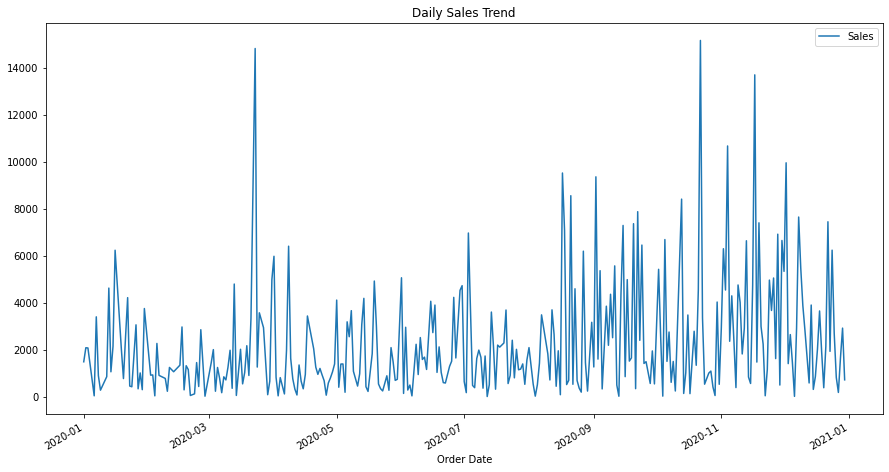

In [57]:
df_trend.plot(figsize=(15,8), title='Daily Sales Trend');

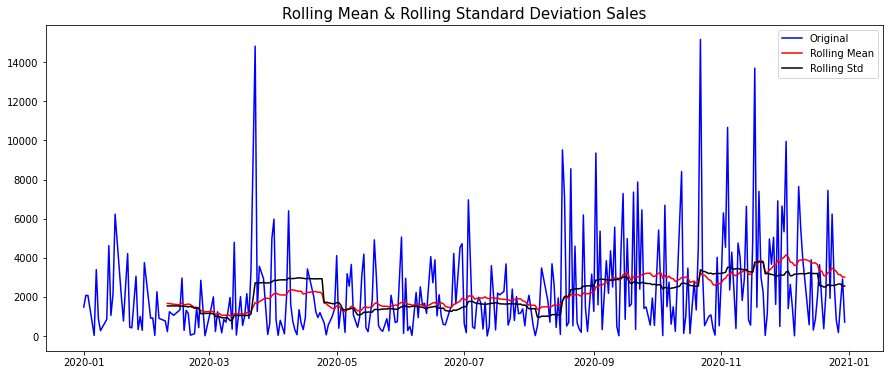

In [60]:
# here we check for stationarity using rolling mean and rolling std
rolling_mean = df_trend.rolling(window = 30).mean()       
rolling_std = df_trend.rolling(window = 30).std()

plt.figure(figsize=(15,6))
plt.plot(df_trend, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation Sales', size=15)
plt.show()

In [61]:
# Dickey-Fuller test for checking stationarity
import statsmodels.tsa.stattools as sts

sts.adfuller(df_trend.Sales)

(-2.04765827841529,
 0.26607517340662273,
 14,
 307,
 {'1%': -3.4518314994261337,
  '5%': -2.8710009653519166,
  '10%': -2.571810878948318},
 5601.402892707306)

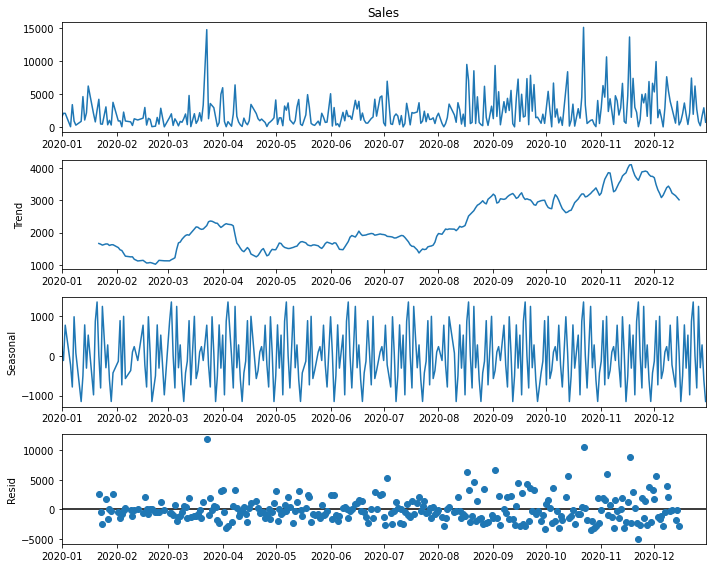

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

s_dec_additive = seasonal_decompose(df_trend.Sales, model = 'additive', period=30)

from pylab import rcParams
rcParams['figure.figsize'] = 10,8
s_dec_additive_plot = s_dec_additive.plot()

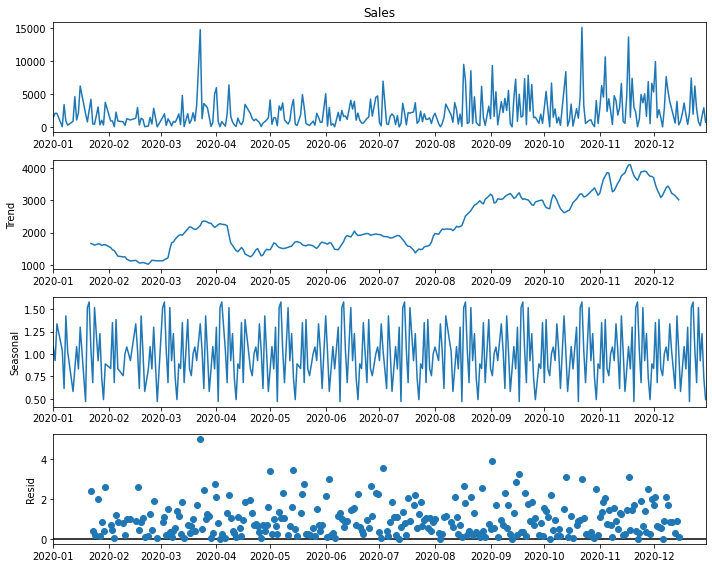

In [63]:
s_dec_additive = seasonal_decompose(df_trend.Sales, model = 'multiplicative', period=30)

from pylab import rcParams
rcParams['figure.figsize'] = 10,8
s_dec_additive_plot = s_dec_additive.plot()

In [64]:
df_trend['first_diff'] = df_trend['Sales'] - df_trend['Sales'].shift(1)

In [65]:
df_trend

Sales  first_diff
Order Date                       
2020-01-01  1481.8280         NaN
2020-01-02  2079.5540    597.7260
2020-01-03  2070.2720     -9.2820
2020-01-06    33.7400  -2036.5320
2020-01-07  3395.5900   3361.8500
...               ...         ...
2020-12-26   814.5940  -1884.3330
2020-12-27   177.6360   -636.9580
2020-12-28  1657.3508   1479.7148
2020-12-29  2915.5340   1258.1832
2020-12-30   713.7900  -2201.7440

[322 rows x 2 columns]

In [66]:
sts.adfuller(df_trend['first_diff'][1:])

(-9.827108725884473,
 5.152699904769867e-17,
 13,
 307,
 {'1%': -3.4518314994261337,
  '5%': -2.8710009653519166,
  '10%': -2.571810878948318},
 5585.901959083429)

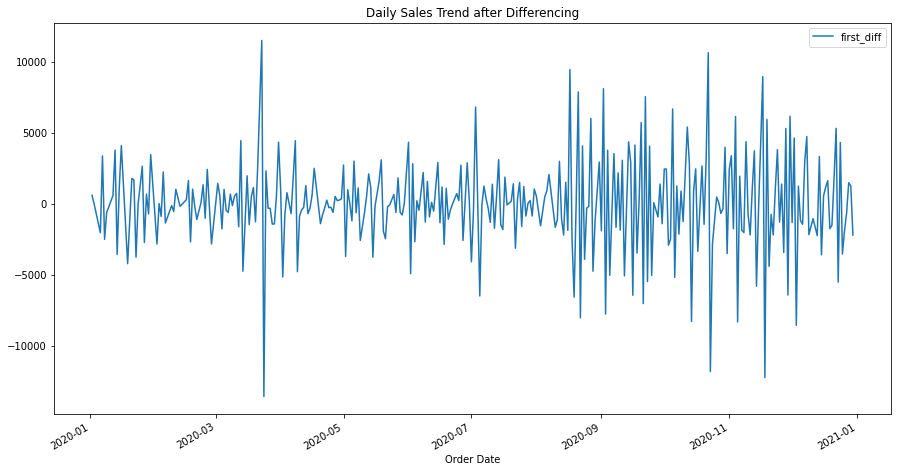

In [68]:
df_trend.plot(y='first_diff',figsize=(15,8), title='Daily Sales Trend after Differencing');

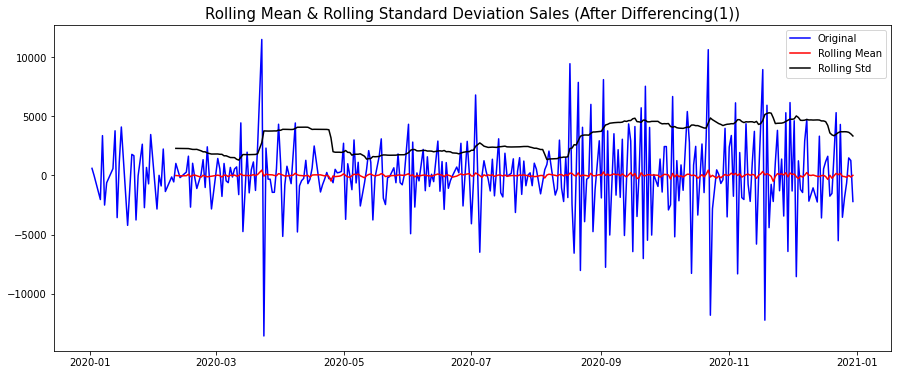

In [69]:
# here we check for stationarity using rolling mean and rolling std
rolling_mean = df_trend.first_diff[1:].rolling(window = 30).mean()       
rolling_std = df_trend.first_diff[1:].rolling(window = 30).std()

plt.figure(figsize=(15,6))
plt.plot(df_trend.first_diff[1:], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation Sales (After Differencing(1))', size=15);

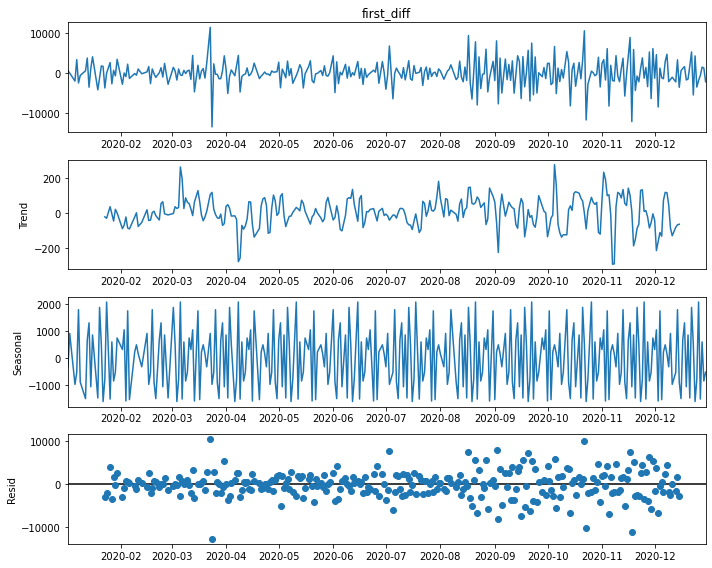

In [70]:
s_dec_additive = seasonal_decompose(df_trend.first_diff[1:], model = 'additive', period=30)

from pylab import rcParams
rcParams['figure.figsize'] = 10,8
s_dec_additive_plot = s_dec_additive.plot()

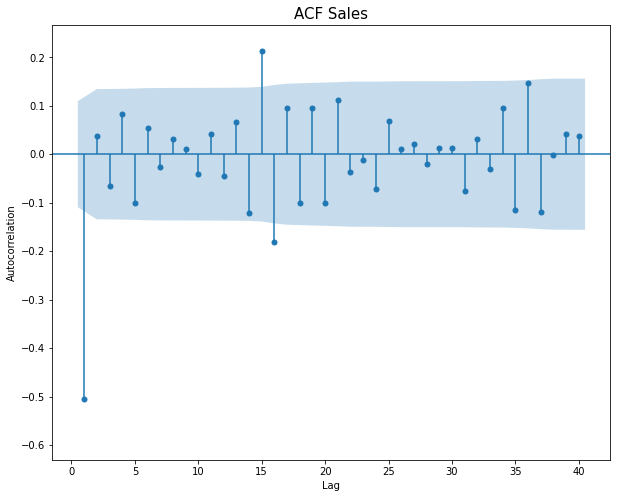

In [71]:
# plot ACF and PACF for returns
import statsmodels.graphics.tsaplots as sgt
acf_plot = sgt.plot_acf(df_trend.first_diff[1:], lags=40, zero=False, auto_ylims=True)
plt.title('ACF Sales', size=15)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation');

c:\users\johnd\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



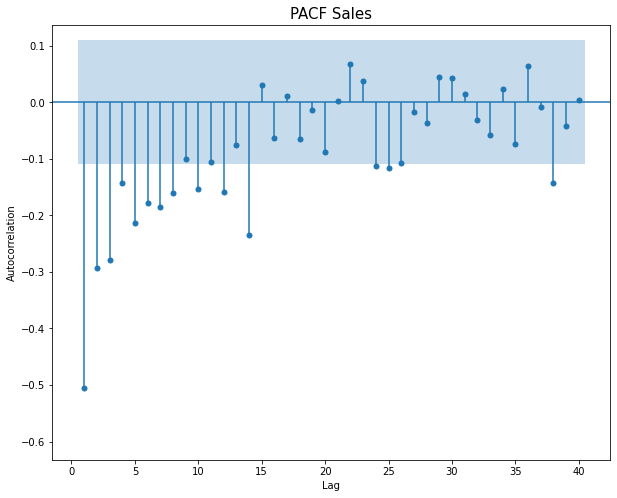

In [72]:
pacf_plot = sgt.plot_pacf(df_trend.first_diff[1:], lags=40, zero=False, auto_ylims=True)
plt.title('PACF Sales', size=15)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation');

In [73]:
from statsmodels.tsa.arima.model import ARIMA
model_arima_1 = ARIMA(df_trend.Sales, order=(1,1,1))
results_model_arima_1 = model_arima_1.fit()
results_model_arima_1.summary()

c:\users\johnd\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\johnd\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\johnd\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  322
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2947.989
Date:                Fri, 18 Feb 2022   AIC                           5901.978
Time:                        04:28:30   BIC                           5913.292
Sample:                             0   HQIC                          5906.495
                                - 322                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0081      0.066     -0.123      0.902      -0.137       0.121
ma.L1         -0.9673      0.016    -61.940      0.000      -0.998      -0.937
sigma2      5.515e+06    2.4e+05     22.931      0.000    5.04e+06    5.99e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               753.10
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.34   Skew:                             2.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [75]:
model_sarimax = SARIMAX(df_trend.Sales, order=(1,1,1), seasonal_order=(1,1,1,30)) 
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

c:\users\johnd\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\users\johnd\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  322
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -2698.192
Date:                            Fri, 18 Feb 2022   AIC                           5406.385
Time:                                    04:28:56   BIC                           5424.751
Sample:                                         0   HQIC                          5413.743
                                            - 322                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0171      0.069      0.248      0.804      -0.118       0.152
ma.L1         -1.0000      0.108     -9.220      0.000      -1.213      -0.787
ar.S.L30      -0.1076      0.069     -1.555      0.120      -0.243       0.028
ma.S.L30      -0.9311      0.149     -6.244      0.000      -1.223      -0.639
sigma2      5.655e+06   1.94e-08   2.92e+14      0.000    5.66e+06    5.66e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               334.59
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.52   Skew:                             1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.41e+29. Standard errors may be unstable.
"""

In [76]:
df_trend['prediction']=results_sarimax.predict()

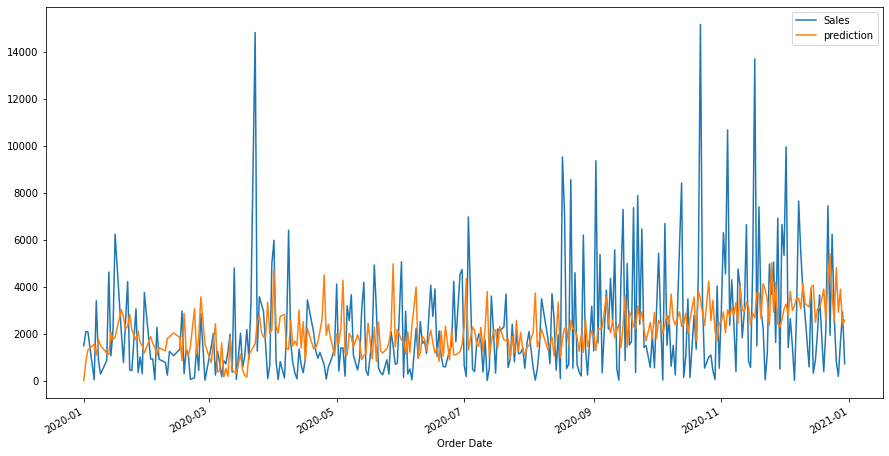

In [77]:
df_trend[['Sales', 'prediction']].plot(figsize=(15,8));